In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [4]:
df = pd.read_csv('CLEANED_Algerian_forest_fires_dataset_.csv')

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
df.drop(['day', 'month', 'year'], inplace=True, axis=1)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


Encoding the values of fire -> 1 and not fire -> 0

In [9]:
df['Classes'] = df['Classes'].apply(lambda val: 0 if val == 'not fire' else 1)
# df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [11]:
df['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [12]:
x = df.drop('FWI', axis=1)
y = df['FWI']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1079)

In [14]:
x_train.shape, x_test.shape

((183, 11), (61, 11))

In [15]:
x_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
169,33,68,15,0.0,86.1,23.9,51.6,5.2,23.9,1,1
22,32,62,18,0.1,81.4,8.2,47.7,3.3,11.5,1,0
100,30,77,15,1.0,56.1,2.1,8.4,0.7,2.6,0,0
199,42,24,9,0.0,96.0,30.3,76.4,15.7,30.4,1,1
191,39,43,12,0.0,91.7,16.5,30.9,9.6,16.4,1,1


## **Feature Selection**

In [16]:
corr = x_train.corr()
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.647363,-0.286172,-0.326298,0.683941,0.525685,0.400849,0.630843,0.496596,0.556666,0.270351
RH,-0.647363,1.000000,0.237220,0.230658,-0.662892,-0.443518,-0.223063,-0.713050,-0.376042,-0.462704,-0.405217
Ws,-0.286172,0.237220,1.000000,0.254445,-0.222359,-0.048882,0.027422,-0.043686,-0.021184,-0.142596,-0.163299
Rain,-0.326298,0.230658,0.254445,1.000000,-0.518442,-0.286153,-0.297863,-0.347341,-0.295852,-0.377895,-0.057762
FFMC,0.683941,-0.662892,-0.222359,-0.518442,1.000000,0.623024,0.504613,0.738109,0.601510,0.771492,0.225899
DMC,0.525685,-0.443518,-0.048882,-0.286153,0.623024,1.000000,0.868502,0.695205,0.982945,0.626617,0.197425
DC,0.400849,-0.223063,0.027422,-0.297863,0.504613,0.868502,1.000000,0.491595,0.942574,0.514361,-0.108527
ISI,0.630843,-0.713050,-0.043686,-0.347341,0.738109,0.695205,0.491595,1.000000,0.640350,0.735007,0.277072
BUI,0.496596,-0.376042,-0.021184,-0.295852,0.601510,0.982945,0.942574,0.640350,1.000000,0.607259,0.088475
Classes,0.556666,-0.462704,-0.142596,-0.377895,0.771492,0.626617,0.514361,0.735007,0.607259,1.000000,0.198970


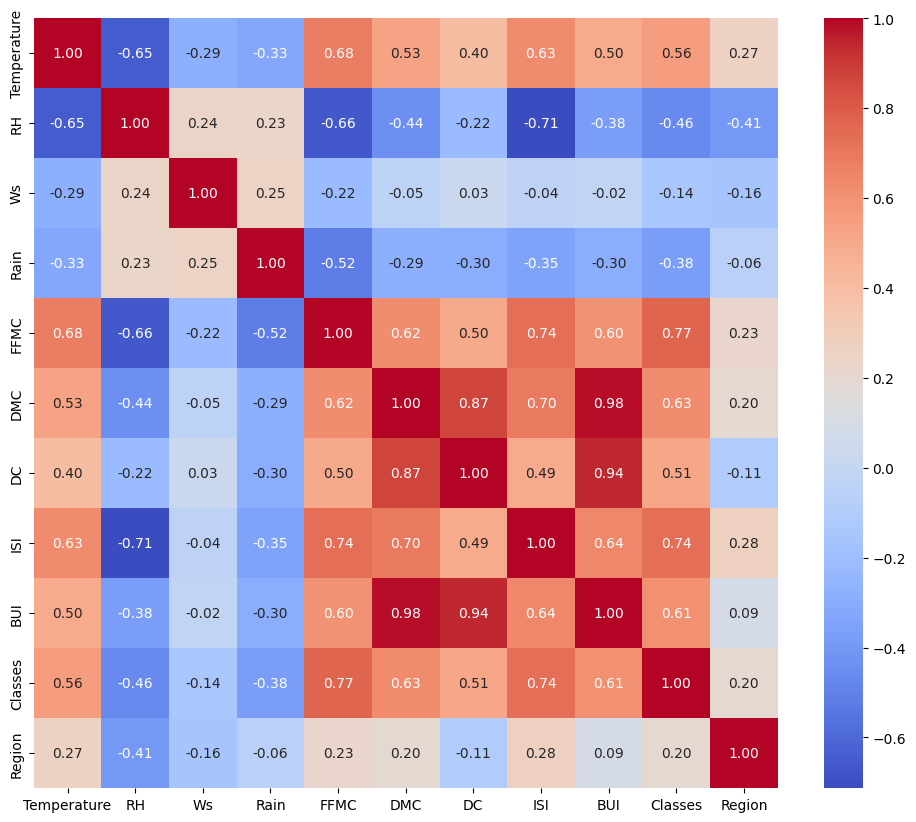

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [18]:
def get_highly_corr_col(df, thershold=0.8):
    corr_pairs = set()
    corr_matrix = df.corr(numeric_only=True)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > thershold:
                column_name = df.columns[i]    
                corr_pairs.add(column_name)

    return corr_pairs

In [19]:
correlated_features = get_highly_corr_col(x_train, 0.85)

In [20]:
print(correlated_features)

{'DC', 'BUI'}


In [21]:
x_train.drop(correlated_features, axis=1, inplace=True)
x_test.drop(correlated_features, axis=1, inplace=True)

In [22]:
x_train.shape, x_test.shape

((183, 9), (61, 9))

## **Feature Scaling**

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
x_train_scaled

array([[ 0.1853403 ,  0.40140929, -0.18415992, ...,  0.08051124,
         0.87155917,  0.96245301],
       [-0.08818611,  0.01781712,  0.91479439, ..., -0.36810667,
         0.87155917, -1.03901177],
       [-0.63523892,  0.97679754, -0.18415992, ..., -0.98200486,
        -1.14736903, -1.03901177],
       ...,
       [-0.63523892,  0.97679754,  2.01374869, ..., -0.88755898,
        -1.14736903, -1.03901177],
       [ 1.00591951, -1.06902735, -0.55047802, ..., -0.67505576,
        -1.14736903, -1.03901177],
       [ 0.73239311, -1.77227966,  0.18215818, ...,  0.62357502,
         0.87155917,  0.96245301]], shape=(183, 9))

## **Multi-variable Linear Regression**

In [25]:
lr_model = LinearRegression()

lr_model.fit(x_train_scaled, y_train)

LinearRegression()

In [26]:
y_pred = lr_model.predict(x_test_scaled)

In [28]:
mae_lr = mean_absolute_error(y_test, y_pred)

r2Score_lr = r2_score(y_test, y_pred)

In [29]:
print(f'Mean Absolute Error: {mae_lr}\nAccuracy: {r2Score_lr*100}')

Mean Absolute Error: 0.8673458143855209
Accuracy: 97.61913687579865


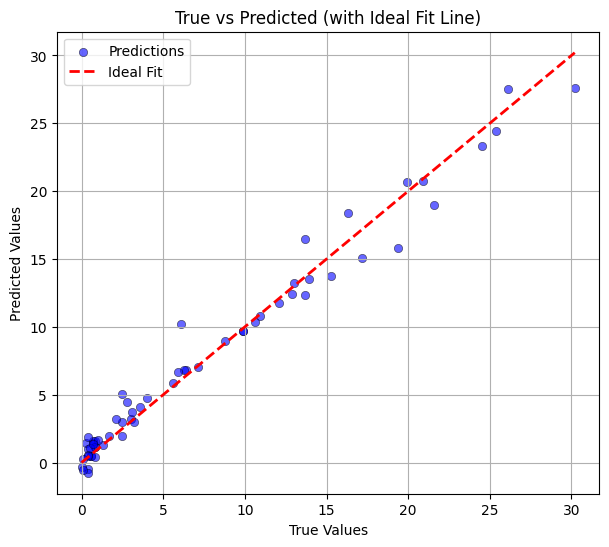

In [38]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6, edgecolor="k", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted (with Ideal Fit Line)")
plt.grid(axis='both')
plt.legend()
plt.show()

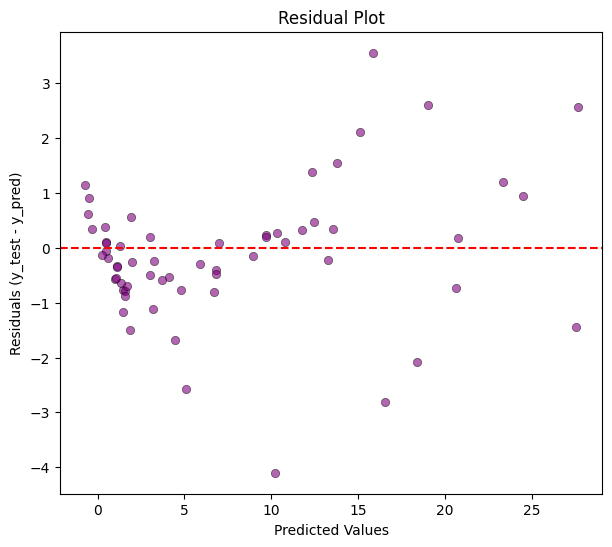

In [39]:
residuals = y_test - y_pred

plt.figure(figsize=(7,6))
sns.scatterplot(x=y_pred, y=residuals, color="purple", alpha=0.6, edgecolor="k")
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residual Plot")
plt.show()

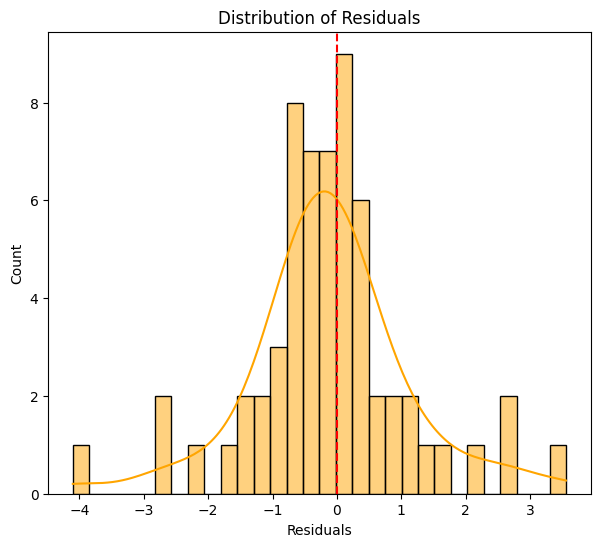

In [40]:
plt.figure(figsize=(7,6))
sns.histplot(residuals, bins=30, kde=True, color="orange")
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

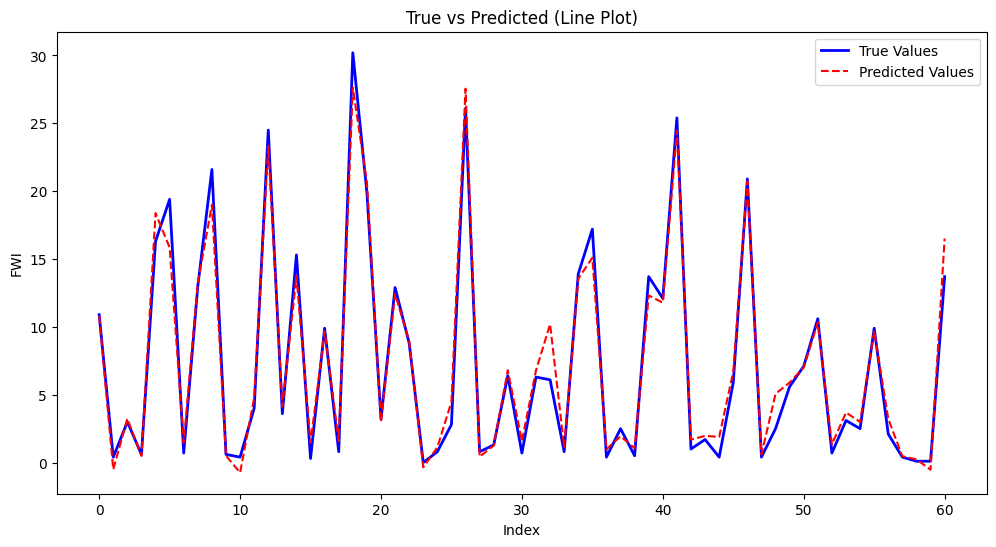

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="True Values", color="blue", linewidth=2)
plt.plot(y_pred, label="Predicted Values", color="red", linestyle="--")
plt.xlabel("Index")
plt.ylabel("FWI")
plt.title("True vs Predicted (Line Plot)")
plt.legend()
plt.show()

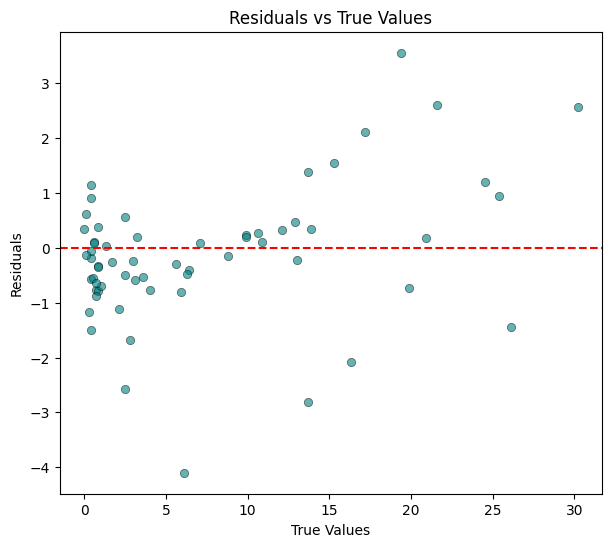

In [42]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=residuals, color="teal", alpha=0.6, edgecolor="k")
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.title("Residuals vs True Values")
plt.show()

## **Lasso Regression**

In [43]:
from sklearn.linear_model import Lasso

In [45]:
lasso = Lasso()

lasso.fit(x_train_scaled, y_train)

Lasso()

In [46]:
y_pred_lasso = lasso.predict(x_test_scaled)

In [ ]:
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

score_lasso = r2_score(y_test, y_pred_lasso)

In [48]:
print(f'Mean Absolute Error: {mae_lasso}\nAccuracy: {score_lasso*100}')

Mean Absolute Error: 1.5761366934324053
Accuracy: 93.52483614962945


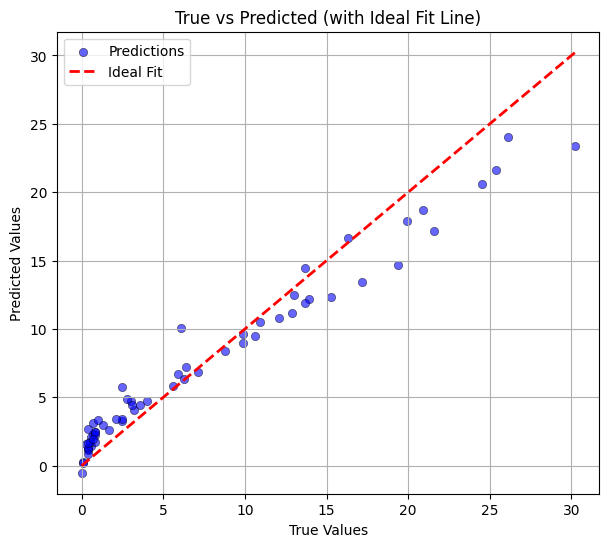

In [49]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_lasso, color="blue", alpha=0.6, edgecolor="k", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted (with Ideal Fit Line)")
plt.grid(axis='both')
plt.legend()
plt.show()

## **Ridge Regression**

In [50]:
from sklearn.linear_model import Ridge

In [51]:
ridge = Ridge()

ridge.fit(x_train_scaled, y_train)

Ridge()

In [52]:
y_pred_ridge = ridge.predict(x_test_scaled)

In [53]:
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

score_ridge = r2_score(y_test, y_pred_ridge)

In [54]:
print(f'Mean Absolute Error: {mae_ridge}\nAccuracy: {score_ridge*100}')

Mean Absolute Error: 0.8845094015658711
Accuracy: 97.56360507898954


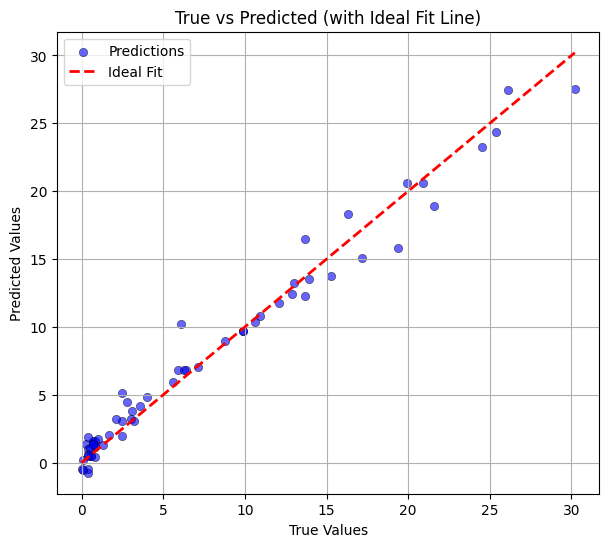

In [55]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_ridge, color="blue", alpha=0.6, edgecolor="k", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted (with Ideal Fit Line)")
plt.grid(axis='both')
plt.legend()
plt.show()

## **Elastic-Net Regression**

In [57]:
from sklearn.linear_model import ElasticNet

In [58]:
elastic = ElasticNet()

elastic.fit(x_train_scaled, y_train)

ElasticNet()

In [59]:
y_pred_elastic = elastic.predict(x_test_scaled)

In [60]:
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)

score_elastic = r2_score(y_test, y_pred_elastic)

In [61]:
print(f'Mean Absolute Error: {mae_elastic}\nAccuracy: {score_elastic*100}')

Mean Absolute Error: 2.275664788614631
Accuracy: 86.62855804586361


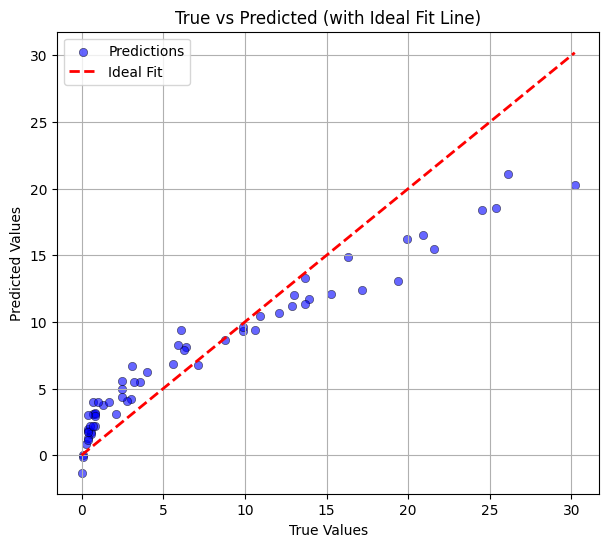

In [62]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_elastic, color="blue", alpha=0.6, edgecolor="k", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted (with Ideal Fit Line)")
plt.grid(axis='both')
plt.legend()
plt.show()

In [ ]:
n, x, y = map(int, input().split())

k = y // x      
print((n + k - 1) // k)


6
